Análisis y visualización de datos

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Número de registros solicitados
num_records = 50

# Generar datos de productos
products = [f'Producto_{i}' for i in np.random.randint(1, 7, size=num_records)] # 14 productos diferentes

# Generar fechas aleatorias para el último año
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
dates = [start_date + (end_date - start_date) * np.random.rand() for _ in range(num_records)]

# Generar ventas aleatorias
sales = np.random.randint(10, 1000, size=num_records)

# Crear el DataFrame
df = pd.DataFrame({
    'producto': products,
    'fecha': dates,
    'ventas': sales
})

# Convertir la columna 'fecha' para mostrar solo la fecha (sin hora)
df['fecha'] = df['fecha'].dt.date

# Mostrar los primeros registros del DataFrame
print(df.head())

# Mostrar información general del DataFrame
print(df.info())

# Opcional: ordenar por fecha para ver mejor las coincidencias
df = df.sort_values(by='fecha').reset_index(drop=True)
print("\nDataFrame ordenado por fecha (primeros 10 registros para ver coincidencias):")
print(df.head(10))

     producto       fecha  ventas
0  Producto_2  2025-12-12     114
1  Producto_1  2025-02-16     944
2  Producto_4  2025-04-15     632
3  Producto_5  2025-06-05     115
4  Producto_6  2025-05-08      63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   producto  50 non-null     object
 1   fecha     50 non-null     object
 2   ventas    50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None

DataFrame ordenado por fecha (primeros 10 registros para ver coincidencias):
     producto       fecha  ventas
0  Producto_5  2025-02-06     798
1  Producto_2  2025-02-12     500
2  Producto_4  2025-02-15     540
3  Producto_1  2025-02-16     944
4  Producto_3  2025-02-22     877
5  Producto_1  2025-02-23     754
6  Producto_3  2025-03-01     208
7  Producto_6  2025-03-03     865
8  Producto_5  2025-03-16     109
9  Producto_2  2025-03-25     5

/tmp/ipython-input-1464057152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='producto', y='ventas', data=df, palette='viridis')


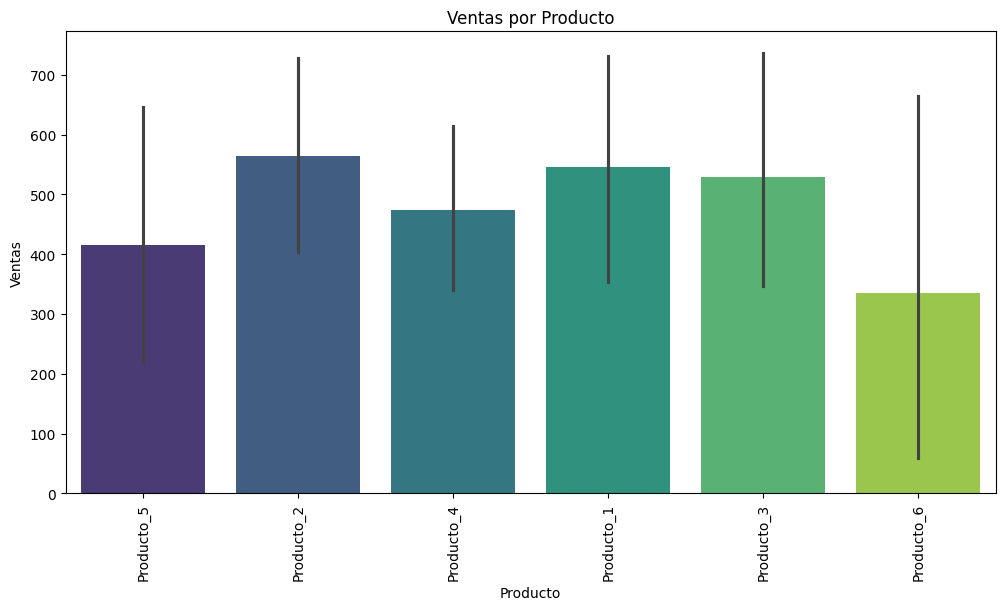

In [9]:
#Visualización de datos, gráficas de ventas por productos y fechas
plt.figure(figsize=(12, 6))
sns.barplot(x='producto', y='ventas', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.title('Ventas por Producto')
plt.show()


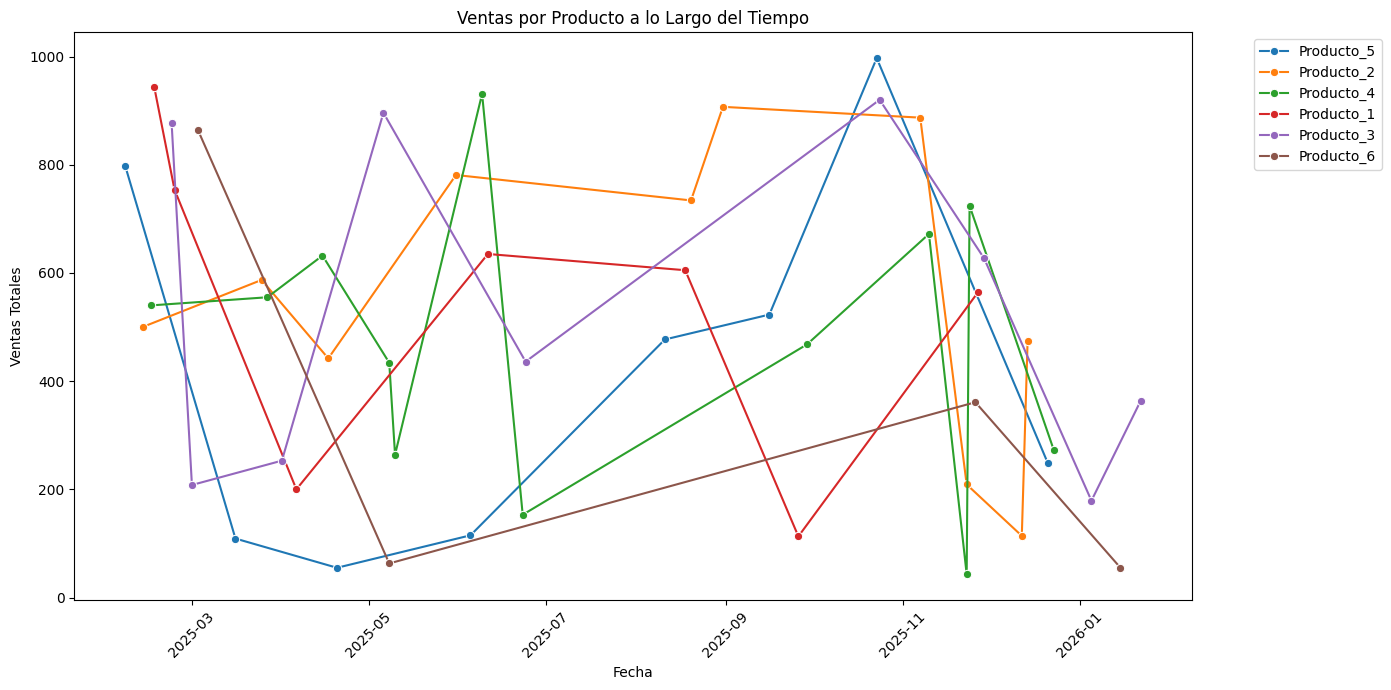

In [10]:
# Agrupar por fecha y producto para sumar las ventas
df_ventas_fecha_producto = df.groupby(['fecha', 'producto'])['ventas'].sum().reset_index()

# Visualizar ventas por producto a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_ventas_fecha_producto, x='fecha', y='ventas', hue='producto', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.title('Ventas por Producto a lo Largo del Tiempo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()